In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
#read dataset
df = pd.read_csv('/content/drive/MyDrive/TASK_JPA/Task 2/Dataset/Clicked Ads Dataset.csv')

In [146]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


Data Preparation


In [147]:
#do exploratory data analysis
df.info()

#check missing value
print ('missing value sebanyak', df.isnull().sum().sum())
print ('kolom yang memiliki mising value adalah', df.columns[df.isnull().any()].tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB
missing value sebanyak 40
kolom yang memiliki mising value adalah ['Daily Time Spent on Site', 'Area Income', 'Daily

In [148]:
#Drop missing value
df = df.dropna()
df.info ()

#membuat loop untuk mengecek missing value
if df.isnull().values.any():
  print ('Ada missing value')
  print ('jumlah missing value sebanyak', df.isnull().sum().sum())
  df = df.dropna()
else:
  print ('Tidak ada missing value')

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                963 non-null    int64  
 1   Daily Time Spent on Site  963 non-null    float64
 2   Age                       963 non-null    int64  
 3   Area Income               963 non-null    float64
 4   Daily Internet Usage      963 non-null    float64
 5   Male                      963 non-null    object 
 6   Timestamp                 963 non-null    object 
 7   Clicked on Ad             963 non-null    object 
 8   city                      963 non-null    object 
 9   province                  963 non-null    object 
 10  category                  963 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 90.3+ KB
Tidak ada missing value


In [149]:
#Check duplicate
print ('jumlah data duplikat sebanyak', df.duplicated().sum())

jumlah data duplikat sebanyak 0


In [150]:
#Simpan dataset bersih untuk digunakan
df.to_csv('/content/drive/MyDrive/TASK_JPA/Task 2/Dataset/Clicked Ads Dataset Clean_A.csv', index=False)

#Gunakan Dataset bersih baru
df = pd.read_csv('/content/drive/MyDrive/TASK_JPA/Task 2/Dataset/Clicked Ads Dataset Clean_A.csv')

In [151]:
#Read data set
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


Part 1. Costumer type behaviour analysis on adverts.

Buat analisis univariate pada kolom umur, penggunaan internet harian, dan daily time spent on site dengan membedakan user yang mengklik iklan dan yang tidak(Hint: Perhatikan distribusi pada setiap kolom pada dataset)

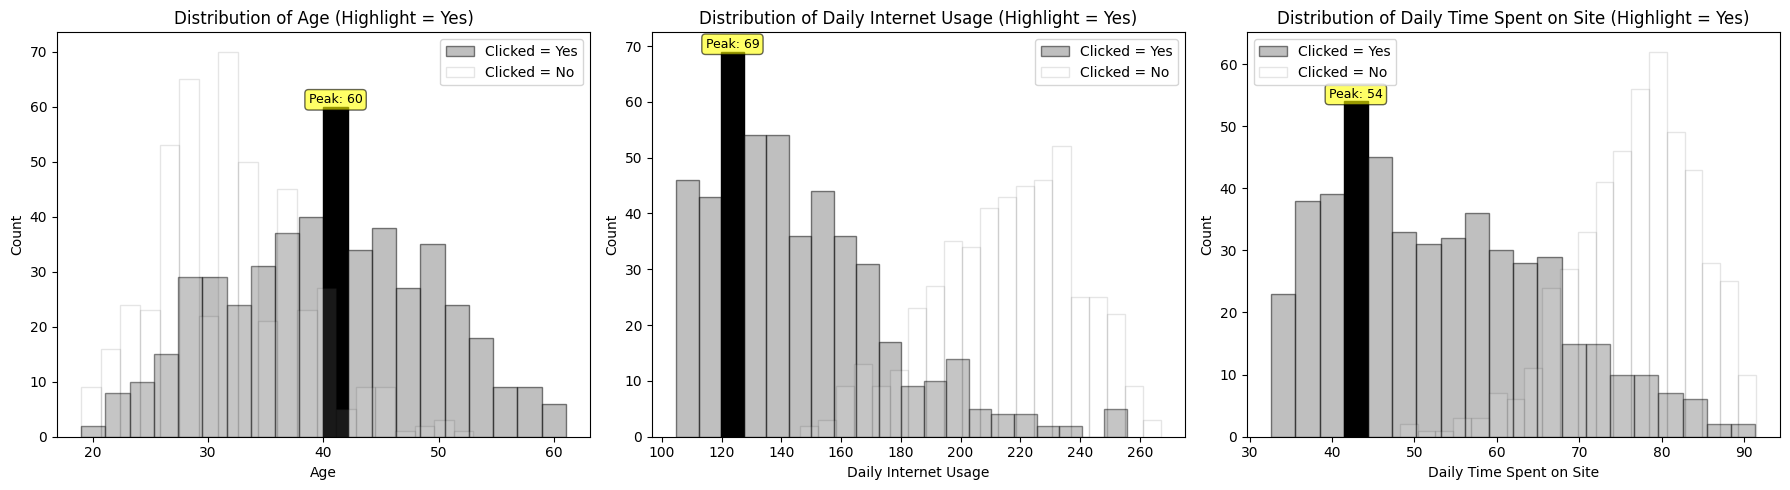

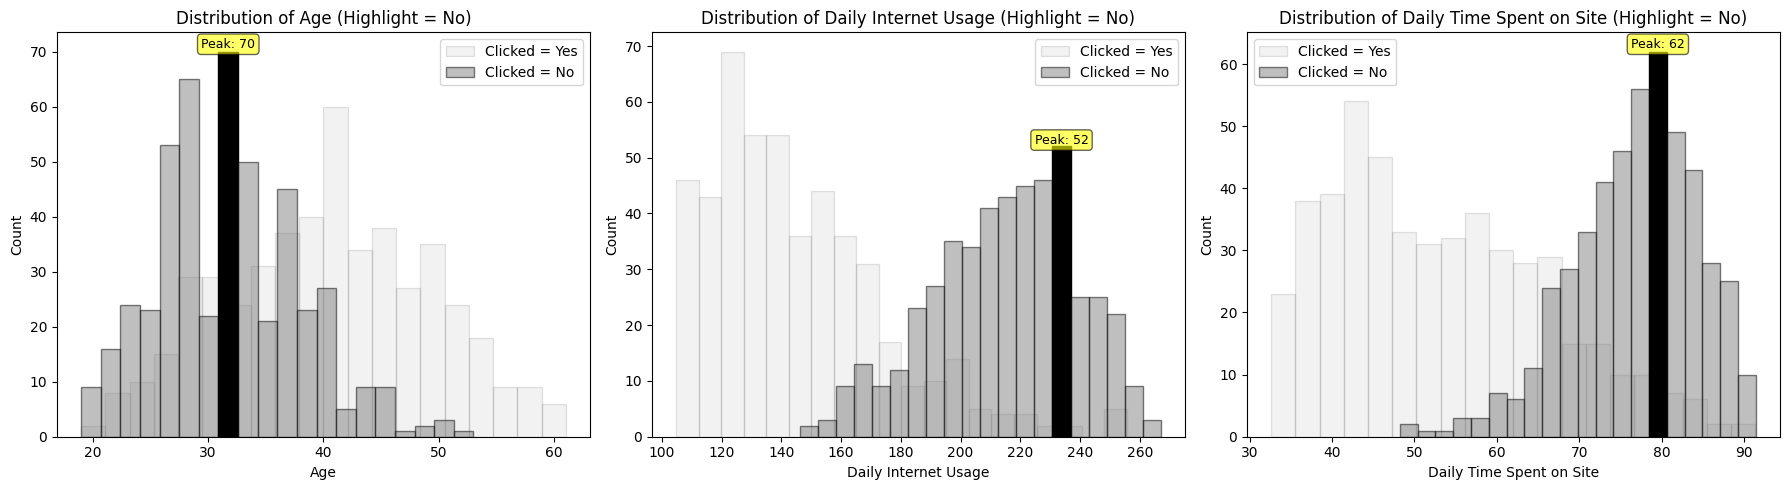

In [152]:
# Columns for univariate analysis
#--------------------------------------#
#Highligted Yes
cols = ["Age", "Daily Internet Usage", "Daily Time Spent on Site"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(cols):
    # Loop through both groups
    for label, color, faded_color in [
        ("Yes", "grey", "grey"),   # highlight Yes
        ("No", "white", "white")        # faded No
    ]:
        subset = df[df["Clicked on Ad"] == label]
        counts, bins, patches = axes[i].hist(
            subset[col], bins=20, alpha=0.7 if label=="Yes" else 0.1,
            color=color if label=="Yes" else faded_color,
            edgecolor="black", label=f"Clicked = {label}"
        )

        # Highlight peak only for "Yes"
        if label == "Yes":
            max_idx = counts.argmax()
            max_val = counts[max_idx]
            bin_center = (bins[max_idx] + bins[max_idx+1]) / 2

            # Make all "Yes" bars faded except peak
            for j, patch in enumerate(patches):
                if j == max_idx:
                    patch.set_facecolor("Black")   # special color for peak
                    patch.set_alpha(1.0)
                else:
                    patch.set_alpha(0.5)

            # Annotate tallest bar
            axes[i].annotate(
                f"Peak: {int(max_val)}",
                xy=(bin_center, max_val),
                xytext=(bin_center, max_val + max_val*0.01),
                ha="center", fontsize=9, color="black",
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.6),
            )

    axes[i].set_title(f"Distribution of {col} (Highlight = Yes)")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].legend()

plt.tight_layout()
plt.show()


#-----------------------------------------------------#
#Highlighted No
cols = ["Age", "Daily Internet Usage", "Daily Time Spent on Site"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(cols):
    # Loop through both groups
    for label, color, faded_color in [
        ("Yes", "white", "grey"),   # highlight Yes
        ("No", "grey", "white")        # faded No
    ]:
        subset = df[df["Clicked on Ad"] == label]
        counts, bins, patches = axes[i].hist(
            subset[col], bins=20, alpha=0.7 if label=="No" else 0.1,
            color=color if label=="No" else faded_color,
            edgecolor="black", label=f"Clicked = {label}"
        )

        # Highlight peak only for "Yes"
        if label == "No":
            max_idx = counts.argmax()
            max_val = counts[max_idx]
            bin_center = (bins[max_idx] + bins[max_idx+1]) / 2

            # Make all "Yes" bars faded except peak
            for j, patch in enumerate(patches):
                if j == max_idx:
                    patch.set_facecolor("Black")   # special color for peak
                    patch.set_alpha(1.0)
                else:
                    patch.set_alpha(0.5)

            # Annotate tallest bar
            axes[i].annotate(
                f"Peak: {int(max_val)}",
                xy=(bin_center, max_val),
                xytext=(bin_center, max_val + max_val*0.01),
                ha="center", fontsize=9, color="black",
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.6),
            )

    axes[i].set_title(f"Distribution of {col} (Highlight = No)")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].legend()

plt.tight_layout()
plt.show()

Part 2. Bivariate Analysis

Buatlah bivariate analysis pada variable yang telah diteliti pada univatriate analysis (Hint:Perhatikan hubungan antar kolom pada dataset)

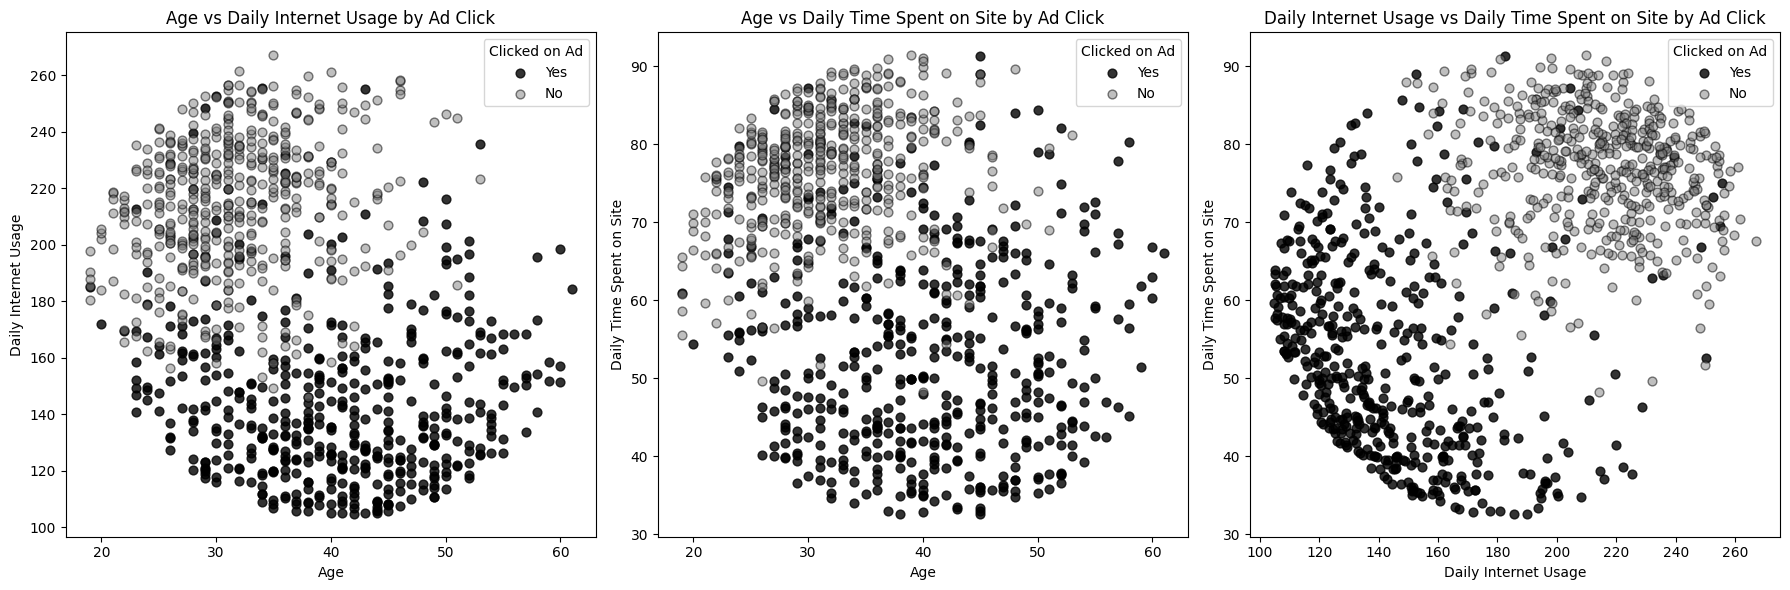

In [153]:
import matplotlib.pyplot as plt

# Custom colors
colors = {"Yes": "Black", "No": "Gray"}

# Features for pairwise scatterplots
pairs = [
    ("Age", "Daily Internet Usage"),
    ("Age", "Daily Time Spent on Site"),
    ("Daily Internet Usage", "Daily Time Spent on Site")
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (x, y) in enumerate(pairs):
    for label in ["Yes", "No"]:
        subset = df[df["Clicked on Ad"] == label]
        alpha = 0.8 if label == "Yes" else 0.5
        axes[i].scatter(subset[x], subset[y], label=label, color=colors[label], alpha=alpha, edgecolor="black", s=40)

    axes[i].set_title(f"{x} vs {y} by Ad Click")
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)
    axes[i].legend(title="Clicked on Ad")

plt.tight_layout()
plt.show()


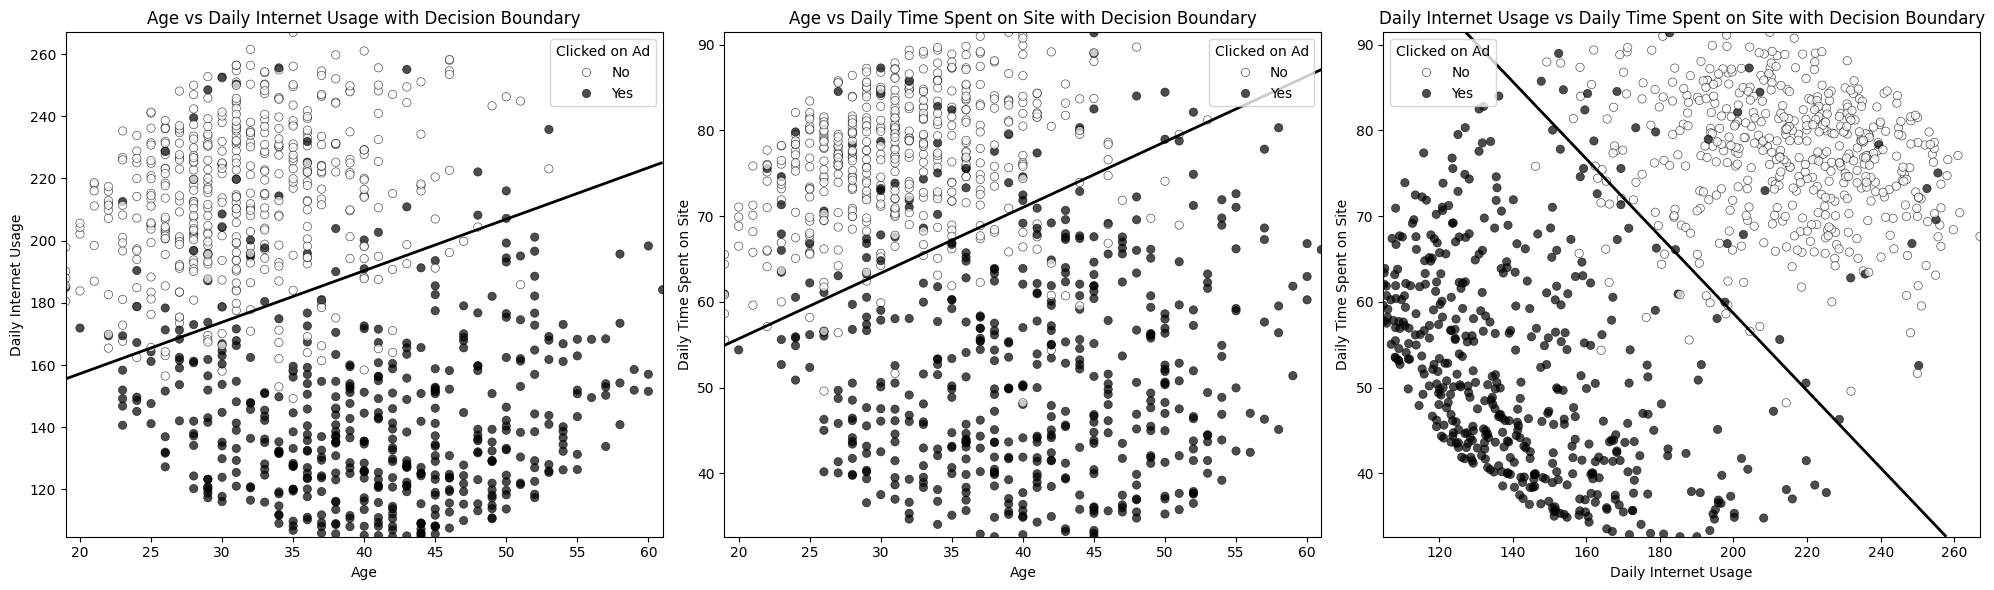

In [154]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import numpy as np

pairs = [
    ("Age", "Daily Internet Usage"),
    ("Age", "Daily Time Spent on Site"),
    ("Daily Internet Usage", "Daily Time Spent on Site")
]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, (x, y) in enumerate(pairs):
    # Scatterplot
    sns.scatterplot(data=df, x=x, y=y, hue="Clicked on Ad",
                    palette={"Yes": "black", "No": "white"},
                    alpha=0.7, edgecolor="black", ax=axes[i])

    # Fit logistic regression
    X = df[[x, y]].values
    y_target = (df["Clicked on Ad"] == "Yes").astype(int).values
    model = LogisticRegression().fit(X, y_target)

    # Create grid
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min(), X[:,0].max(), 200),
        np.linspace(X[:,1].min(), X[:,1].max(), 200)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

    # Plot decision boundary
    axes[i].contour(xx, yy, probs, levels=[0.5], cmap="gray", linewidths=2)

    axes[i].set_title(f"{x} vs {y} with Decision Boundary")

plt.tight_layout()
plt.show()


Corellation Analysis

Buatlah korelasi antar kolom dan lakukan multivariate analysis (Hint: Carilah hubungan antar kolom yang memiliki nilai korelasi yang tinggi)

In [155]:
#Decode
df['Clicked on Ad'] = df['Clicked on Ad'].map({'Yes': 1, 'No': 0})

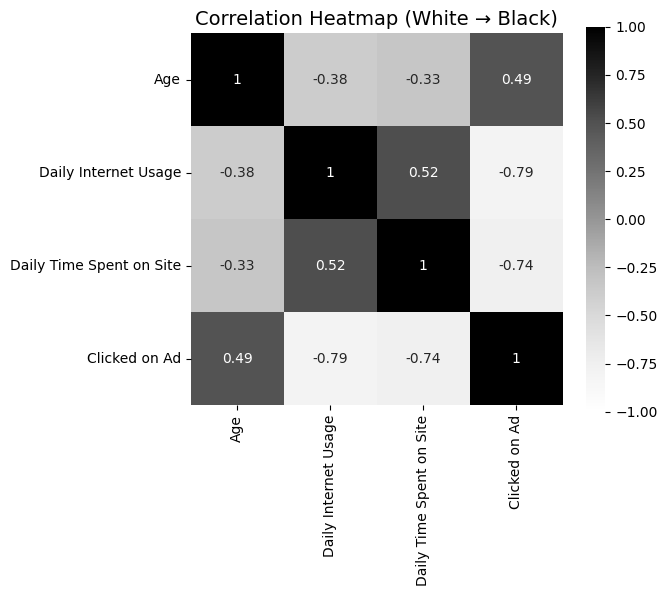

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Select relevant columns
selected_cols = ['Age', 'Daily Internet Usage', 'Daily Time Spent on Site', 'Clicked on Ad']
corr = df[selected_cols].corr()

# Plot heatmap with white -> black
plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    annot=True,
    cmap="Greys",   # grayscale colormap
    vmin=-1, vmax=1,  # ensure full correlation scale is shown
    cbar=True,
    square=True
)

plt.title("Correlation Heatmap (White → Black)", fontsize=14)
plt.show()